In [1]:
def Dijkstra(G, u0, v0):
    """利用Dijkstra计算最短路径和距离"""

    # 初始化参数
    n = G.number_of_nodes()
    nodes = list(range(1, n + 1))
    d_now = np.ones(n) * np.inf
    d_now[u0 - 1] = 0
    parents = [u0 for i in range(n)]
    s = set()
    s.add(u0)
    history = []
    i = 0

    # 遍历所有终点或v0进入最短路径顶点集
    while (i != n - 1) or (v0 not in s):
        not_s = set(nodes) - s
        for v in not_s:
            for u in s:
                try:
                    # 检查顶点u,v间是否有边
                    w = G.edges[u, v]['weight']
                except:
                    pass
                else:
                    d_now[v - 1] = min([d_now[v - 1], d_now[u - 1] + w])
                    if d_now[u - 1] + w <= d_now[v - 1]:
                        # 顶点最短值改变,记录改变
                        parents[v - 1] = u
                        history.append([u, v])

        # 寻找当前的最小距离点,并加入s集合
        tmp = d_now.copy()
        in_s_index = [i - 1 for i in s]
        tmp[in_s_index] = np.inf
        new_u = np.argmin(tmp) + 1
        s.add(new_u)
        i = i + 1

    # 拼接最终的最短路径
    last = v0
    path = [v0]
    history = np.array(history)
    while last != u0:
        k = np.where(history[:, 1] == last)
        last = history[k[-1][-1], 0]
        path.append(last)

    path = path[-1::-1]
    distance = d_now[v0 - 1]
    return path, distance

[(1, 2), (2, 5), (5, 6), (6, 3), (3, 7), (7, 10), (10, 9), (9, 11)]
[1, 2, 5, 6, 3, 7, 10, 9, 11]
13.0


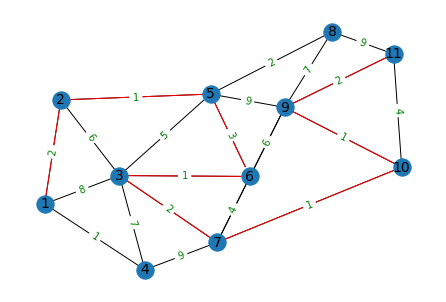

In [12]:
# 导库
import networkx as nx
import numpy as np

# 输入边和权
edges = [(1, 2, 2), (1, 3, 8), (1, 4, 1), (2, 3, 6), (2, 5, 1), (3, 4, 7),
         (3, 5, 5), (3, 6, 1), (3, 7, 2), (4, 7, 9), (5, 6, 3), (5, 8, 2),
         (5, 9, 9), (6, 7, 4), (6, 9, 6), (7, 9, 3), (7, 10, 1), (8, 9, 7),
         (8, 11, 9), (9, 10, 1), (9, 11, 2), (10, 11, 4)]

# 创建空图并添加顶点和边权
G = nx.Graph()
G.add_weighted_edges_from(edges)

# 计算顶点位置
pos = nx.spring_layout(G)

# 绘制无权图
nx.draw(G, pos, with_labels=True, font_size=14)

# 绘制最短路径
path, distance = Dijkstra(G, 1, 11)
shortest_edges = []
for i in range(np.size(path) - 1):
    shortest_edges.append((path[i], path[i + 1]))
print(shortest_edges)
print(path, distance, sep='\n')
nx.draw_networkx_edges(G, pos, edgelist=shortest_edges, edge_color='red')

# 追加绘制权
labels = nx.get_edge_attributes(G, 'weight')
edges = nx.draw_networkx_edge_labels(G,
                                     pos,
                                     edge_labels=labels,
                                     font_color="green")

In [31]:
import networkx as nx
import pandas as pd

path = nx.dijkstra_path(G, u0, v0)  # Dijkstra算法求两点的最短路径列表
distance = nx.dijkstra_path_length(G, u0, v0)  # Dijkstra算法求两点的最短距离

path = nx.shortest_path(G, u0, v0,weight='weight')  # 求两点的最短路径列表
distance = nx.shortest_path_length(G, u0, v0,weight='weight') # 求两点的最短距离

In [32]:
distances = dict(nx.all_pairs_dijkstra_path_length(G))  # 求顶点对之间的最短距离字典
d_df = pd.DataFrame(distances).T
d_df

,1,4,2,5,8,6,3,7,10,9,11
1,0,1,2,3,5,6,7,9,10,11,13
2,2,3,0,1,3,4,5,7,8,9,11
3,7,7,5,4,6,1,0,2,3,4,6
4,1,0,3,4,6,7,7,9,10,11,13
5,3,4,1,0,2,3,4,6,7,8,10
6,6,7,4,3,5,0,1,3,4,5,7
7,9,9,7,6,8,3,2,0,1,2,4
8,5,6,3,2,0,5,6,8,8,7,9
9,11,11,9,8,7,5,4,2,1,0,2
10,10,10,8,7,8,4,3,1,0,1,3


In [33]:
paths = dict(nx.all_pairs_dijkstra_path(G)) # 求顶点对之间的最短路径字典
p_df = pd.DataFrame(paths).T
p_df

,1,2,3,4,7,5,6,8,9,11,10
1,[1],"[1, 2]","[1, 2, 5, 6, 3]","[1, 4]","[1, 2, 5, 6, 3, 7]","[1, 2, 5]","[1, 2, 5, 6]","[1, 2, 5, 8]","[1, 2, 5, 6, 3, 7, 10, 9]","[1, 2, 5, 6, 3, 7, 10, 9, 11]","[1, 2, 5, 6, 3, 7, 10]"
2,"[2, 1]",[2],"[2, 5, 6, 3]","[2, 1, 4]","[2, 5, 6, 3, 7]","[2, 5]","[2, 5, 6]","[2, 5, 8]","[2, 5, 6, 3, 7, 10, 9]","[2, 5, 6, 3, 7, 10, 9, 11]","[2, 5, 6, 3, 7, 10]"
3,"[3, 6, 5, 2, 1]","[3, 6, 5, 2]",[3],"[3, 4]","[3, 7]","[3, 6, 5]","[3, 6]","[3, 6, 5, 8]","[3, 7, 10, 9]","[3, 7, 10, 9, 11]","[3, 7, 10]"
4,"[4, 1]","[4, 1, 2]","[4, 3]",[4],"[4, 7]","[4, 1, 2, 5]","[4, 1, 2, 5, 6]","[4, 1, 2, 5, 8]","[4, 7, 10, 9]","[4, 7, 10, 9, 11]","[4, 7, 10]"
5,"[5, 2, 1]","[5, 2]","[5, 6, 3]","[5, 2, 1, 4]","[5, 6, 3, 7]",[5],"[5, 6]","[5, 8]","[5, 6, 3, 7, 10, 9]","[5, 6, 3, 7, 10, 9, 11]","[5, 6, 3, 7, 10]"
6,"[6, 5, 2, 1]","[6, 5, 2]","[6, 3]","[6, 5, 2, 1, 4]","[6, 3, 7]","[6, 5]",[6],"[6, 5, 8]","[6, 3, 7, 10, 9]","[6, 3, 7, 10, 9, 11]","[6, 3, 7, 10]"
7,"[7, 3, 6, 5, 2, 1]","[7, 3, 6, 5, 2]","[7, 3]","[7, 4]",[7],"[7, 3, 6, 5]","[7, 3, 6]","[7, 3, 6, 5, 8]","[7, 10, 9]","[7, 10, 9, 11]","[7, 10]"
8,"[8, 5, 2, 1]","[8, 5, 2]","[8, 5, 6, 3]","[8, 5, 2, 1, 4]","[8, 5, 6, 3, 7]","[8, 5]","[8, 5, 6]",[8],"[8, 9]","[8, 11]","[8, 9, 10]"
9,"[9, 10, 7, 3, 6, 5, 2, 1]","[9, 10, 7, 3, 6, 5, 2]","[9, 10, 7, 3]","[9, 10, 7, 4]","[9, 10, 7]","[9, 10, 7, 3, 6, 5]","[9, 10, 7, 3, 6]","[9, 8]",[9],"[9, 11]","[9, 10]"
10,"[10, 7, 3, 6, 5, 2, 1]","[10, 7, 3, 6, 5, 2]","[10, 7, 3]","[10, 7, 4]","[10, 7]","[10, 7, 3, 6, 5]","[10, 7, 3, 6]","[10, 9, 8]","[10, 9]","[10, 9, 11]",[10]
